# Chapter 16
@ Imran Ahmad

## Using Lime

If using for the first time, install lime first.

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8e6b07c3127c70b18d097d2d04788859158ab71f2302f96278c420a6cc5a01b1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


 Import the necessary packages

In [2]:
import sklearn
import requests
import pickle
import numpy as np
from lime.lime_tabular import LimeTabularExplainer as ex

In [3]:
# Define the URL
url = "https://storage.googleapis.com/neurals/data/data/housing.pkl"

# Fetch the data from the URL
response = requests.get(url)
data = response.content

# Load the data using pickle
housing = pickle.loads(data)
housing['feature_names']

array(['crime_per_capita', 'zoning_prop', 'industrial_prop',
       'nitrogen_oxide', 'number_of_rooms', 'old_home_prop',
       'distance_from_city_center', 'high_way_access',
       'property_tax_rate', 'pupil_teacher_ratio', 'low_income_prop',
       'lower_status_prop', 'median_price_in_area'], dtype='<U25')

In [4]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    housing.data, housing.target)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
cat_col = [i for i, col in enumerate(housing.data.T)
                        if np.unique(col).size < 10]

In [6]:
myexplainer = ex(X_train,
    feature_names=housing.feature_names,
    class_names=['price'],
    categorical_features=cat_col,
    mode='regression')

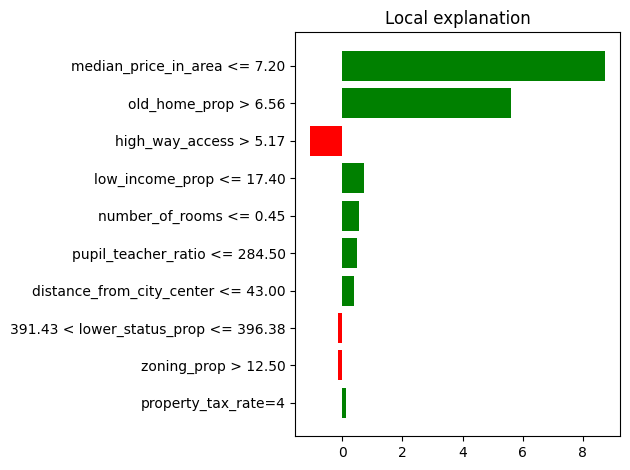

In [7]:
# Now explain a prediction
exp = myexplainer.explain_instance(X_test[25], regressor.predict,
        num_features=10)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [8]:
print(exp.as_list())

[('median_price_in_area <= 7.20', 8.755971928262596), ('old_home_prop > 6.56', 5.6188686578032705), ('high_way_access > 5.17', -1.0782386435908136), ('low_income_prop <= 17.40', 0.7100907802344754), ('number_of_rooms <= 0.45', 0.5574275246532656), ('pupil_teacher_ratio <= 284.50', 0.49496269560069356), ('distance_from_city_center <= 43.00', 0.3808923143033719), ('391.43 < lower_status_prop <= 396.38', -0.14397728216363717), ('zoning_prop > 12.50', -0.13545481467012505), ('property_tax_rate=4', 0.11793995598504388)]


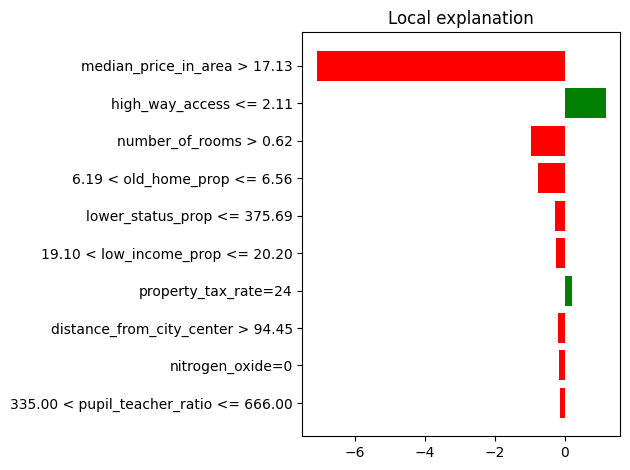

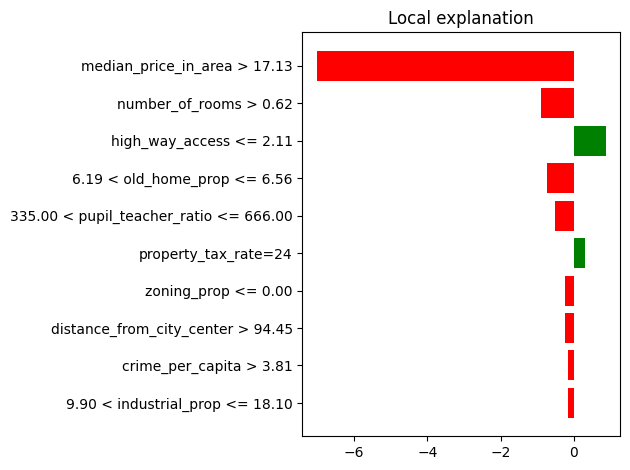

In [9]:
for i in [1, 35]:
    exp = myexplainer.explain_instance(X_test[i], regressor.predict,
            num_features=10)
    exp.as_pyplot_figure()
    plt.tight_layout()